# import lib

In [29]:
#K折交叉验证（k-fold cross validation）https://www.cnblogs.com/bymo/p/9026198.html#_label0
#将数据集分成k份，每一轮用其中(k-1)份做训练而剩余1份做验证，以这种方式执行k轮，得到k个模型．将k次的性能取平均，作为该算法的整体性能．k一般取值为5或者10．

#优点：能比较鲁棒性地评估模型在未知数据上的性能．
#缺点：计算复杂度较大．因此，在数据集较大，模型复杂度较高，或者计算资源不是很充沛的情况下，可能不适用，尤其是在训练深度学习模型的时候．
#sklearn.model_selection提供了KFold以及RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold, GroupKFold, TimeSeriesSplit等变体．

#下面的例子中用的StratifiedKFold采用的是分层抽样，它保证各类别的样本在切割后每一份小数据集中的比例都与原数据集中的比例相同．
#
#dataset is  'https://www.kaggle.com/c/house-prices-advanced-regression-techniques'
#refer https://www.kaggle.com/marsggbo/kaggle/comments#%E4%BA%8C%E3%80%81%E8%A7%82%E5%AF%9F%E5%90%84%E9%A1%B9%E4%B8%BB%E8%A6%81%E7%89%B9%E5%BE%81%E4%B8%8E%E6%88%BF%E5%B1%8B%E5%94%AE%E4%BB%B7%E7%9A%84%E5%85%B3%E7%B3%BB

In [21]:
import pandas as pd
import numpy as np

import xgboost as xgb

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

# !pip3 install -q tensorflow==2.0.0-beta1
# import tensorflow as tf


# import sklearn.preprocessing

# load data

In [22]:
dataset_train = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")
dataset_test_new = pd.read_csv("house-prices-advanced-regression-techniques/test.csv")


dataset_train = dataset_train.drop(columns = ["Id"])
dataset_test_new = dataset_test_new.drop(columns = ["Id"])

# dataset_train.describe()


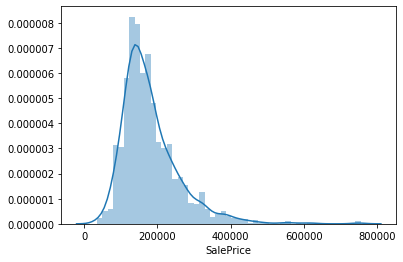

In [16]:
# show distirbution of sale price
sns.distplot(dataset_train['SalePrice'])

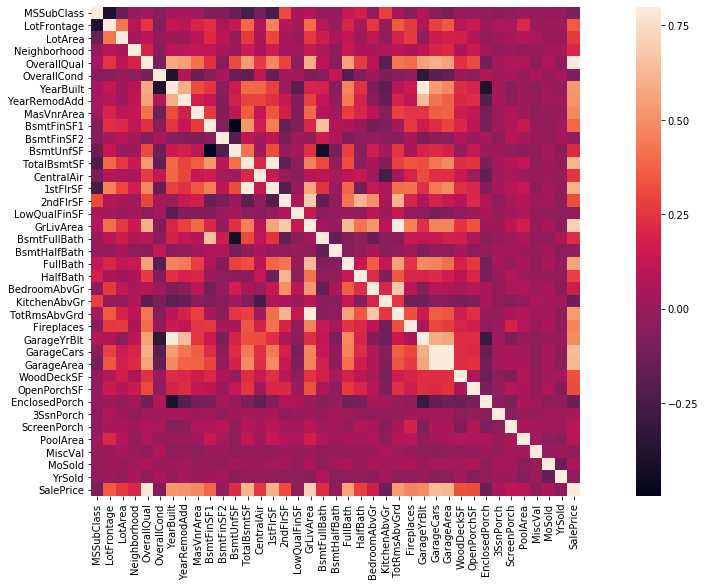

In [23]:
columns_string=['Neighborhood', 'CentralAir']
for column in columns_string:
    label_encoder = preprocessing.LabelEncoder()
    dataset_train[column] = label_encoder.fit_transform(dataset_train[column])
    
corrmat = dataset_train.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)

# preprocess data

In [24]:
contact_df = pd.concat([dataset_train.iloc[:, 0:-1], dataset_test_new],axis=0, ignore_index=True)
def scaleData(df, scaler):
    index = df.dtypes[df.dtypes != 'object'].index
    df[index] = df[index].fillna(0)
    dummy_df = pd.get_dummies(df, dummy_na = True)
    transform_df = scaler.fit_transform(dummy_df)  
    return transform_df
transform_df = scaleData(contact_df, StandardScaler())


X = transform_df[0:dataset_train.shape[0], :]
y = np.log1p(dataset_train['SalePrice'].values)
X_new = transform_df[dataset_train.shape[0]:, :]

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33)


# define model

In [25]:
model = xgb.XGBRegressor(
                 colsample_bytree=0.2,
                 gamma=0.0,
                 learning_rate=0.05,
                 max_depth=6,
                 min_child_weight=1.5,
                 n_estimators=7200,                                                                  
                 reg_alpha=0.9,
                 reg_lambda=0.6,
                 subsample=0.2,
                 seed=42,
                 silent=1)

# train model

In [26]:
model.fit(train_X, train_y)
print("train over")

train over


# predict 

In [28]:
pred_y = model.predict(test_X) 
rmse = mean_squared_error(pred_y, test_y) ** 0.5
print("rmse={}".format(rmse))

pred_y_real = np.expm1(pred_y)

rmse=0.1302054973216144


In [30]:
y_new = model.predict(X_new) 
y_new_real = np.expm1(y_new)
print(y_new_real)

[118961.26 154610.   171722.25 ... 185643.17 113656.35 192087.67]


In [ ]:
# submission = pd.concat([dataset_test['Id'], dataset_test['SalePrice']], axis = 1)
# submission.to_csv("submission.csv", index = False, mode="w")
# submission.head()